# Testing models

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# imoprt seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# import KNN from sklearn
from sklearn.neighbors import KDTree

# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (12, 5)
#improve resolution
%config InlineBackend.figure_format ='retina'


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix

In [56]:
# read 'songDb.tsv' into dataframe with correct encoding  
music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')

c:\Users\shush\Anaconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Cleaning and Filtering rows
- gets rid of NaN values
- removes all songs that are not in the top 5 genres
- fixes indexing 
- fixes dtypes

In [57]:
# Grouping Genres 

base = "genre_dataset.txt"
with open(base) as b:
    lines = b.read().splitlines()
split = np.array(lines)
split[:10]
df = pd.DataFrame(split, columns = ['genres'])
df.loc[df['genres'].str.contains('rock')] = 'Rock'
df.loc[df['genres'].str.contains('hip hop')] = 'Rap'
df.loc[df['genres'].str.contains('country')] = 'Country'
df.loc[df['genres'].str.contains('rap')] = 'Rap'
df.loc[df['genres'].str.contains('r&b')] = 'R&B'
df.loc[df['genres'].str.contains('folk')] = 'Folk'
df.loc[df['genres'].str.contains('acoustic')] = 'Acoustic'
df.loc[df['genres'].str.contains('core')] = 'Punk'
df.loc[df['genres'].str.contains('jazz')] = 'Jazz'
df.loc[df['genres'].str.contains('metal')] = 'Metal'
df.loc[df['genres'].str.contains('edm')] = 'Electronic'
df.loc[df['genres'].str.contains('electronic')] = 'Electronic'
df.loc[df['genres'].str.contains('house')] = 'Electronic'
df.loc[df['genres'].str.contains('industrial')] = 'Electronic'
df.loc[df['genres'].str.contains('glitch')] = 'Electronic'
df.loc[df['genres'].str.contains('idm')] = 'Electronic'
df.loc[df['genres'].str.contains('techno')] = 'Electronic'
df.loc[df['genres'].str.contains('garage')] = 'Electronic'
df.loc[df['genres'].str.contains('reggeaton')] = 'Electronic'
df.loc[df['genres'].str.contains('soul')] = 'Soul'
df.loc[df['genres'].str.contains('pop')] = 'Pop'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('reggae')] = 'reggae'
df.loc[df['genres'].str.contains('punk')] = 'Punk'
df.loc[df['genres'].str.contains('classical')] = 'Classical'
df.loc[df['genres'].str.contains('indie')] = 'Indie'
df.loc[df['genres'].str.contains('ambient')] = 'Ambient'
df.loc[df['genres'].str.contains('grunge')] = 'Punk'
df.loc[df['genres'].str.contains('gospel')] = 'Gospel'
df.loc[df['genres'].str.contains('latin')] = 'Latin'
df.loc[df['genres'].str.contains('grime')] = 'Rap'
df.loc[df['genres'].str.contains('trap')] = 'Rap'
df.loc[df['genres'].str.contains('americana')] = 'Folk'
df.loc[df['genres'].str.contains('bluegrass')] = 'Blues'
df.loc[df['genres'].str.contains('blues')] = 'Blues'
df.loc[df['genres'].str.contains('roots')] = 'Blues'
df.loc[df['genres'].str.contains('dance')] = 'Dance'
df.loc[df['genres'].str.contains('children')] = 'Children'
df.loc[df['genres'].str.contains('synth')] = 'Electronic'
df.loc[df['genres'].str.contains('future')] = 'Dance'
df.loc[df['genres'].str.contains('piano')] = 'Classical'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('prog')] = 'Rock'
df.loc[df['genres'].str.contains('death')] = 'Metal'
df.loc[df['genres'].str.contains('gaze')] = 'Rock'
df.loc[df['genres'].str.contains('sing')] = 'Vocals'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('psych')] = 'Rock'
df.loc[df['genres'].str.contains('medieval')] = 'Folk'
df.loc[df['genres'].str.contains('step')] = 'dance'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('emo')] = 'Punk'
df.loc[df['genres'].str.contains('drone')] = 'Ambient'
df.loc[df['genres'].str.contains('grind')] = 'Punk'
df.loc[df['genres'].str.contains('cappella')] = 'Vocals'
df.loc[df['genres'].str.contains('orchestra')] = 'Classical'
df.loc[df['genres'].str.contains('trance')] = 'Electronic'
df.loc[df['genres'].str.contains('thrash')] = 'Metal'
df.loc[df['genres'].str.contains('alternative')] = 'Alternative'
df.loc[df['genres'].str.contains('worship')] = 'Gospel'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('pipes')] = 'Classical'
df.loc[df['genres'].str.contains('idol')] = 'pop'
df.loc[df['genres'].str.contains('soundtrack')] = 'Film'
df.loc[df['genres'].str.contains('film')] = 'Film'
df.loc[df['genres'].str.contains('wave')] = 'Electronic'
df.loc[df['genres'].str.contains('poetry')] = 'Spoken Word'
df.loc[df['genres'].str.contains('spoken')] = 'Spoken Word'
df.loc[df['genres'].str.contains('electro')] = 'Electronic'
df.loc[df['genres'].str.contains('lo-fi')] = 'Alternative'
df.loc[df['genres'].str.contains('ska')] = 'Ska'

dropped = df.drop_duplicates()
temp = df['genres'].value_counts() # shows the top 5 genres by song count
temp[0:10]

Rock          281
Indie         265
Pop           241
Electronic    181
Rap           179
Metal         166
Punk          147
Folk          105
Classical      93
Jazz           85
Name: genres, dtype: int64

In [58]:
df = music # for testing
df['Genre'].value_counts()

alternativeamericana    1891
electrolatino           1009
doo-wop                  972
reading                  969
nuelectro                909
                        ... 
russianelectronic          2
azeripop                   2
turkishhiphop              1
balticfolk                 1
modernperformance          1
Name: Genre, Length: 625, dtype: int64

In [59]:
df = music # for testing

df = df.rename({'Genre':'genres'}, axis='columns') # rename to match 
df = df.dropna()

# combines subgenres into more general Genres. This function removes all genres outside of the top 5.
# You can alter this to include more than the top 5 genres
def CombineGenre(str_in):

    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        
        if 'alternativeamericana' in str_in:
            output = 'Alternative'
        elif 'electrolatino' in str_in:
            output = 'Electrolatino'
        elif 'doo-wop' in str_in:
            output = 'Doo-wop'
        elif 'reading' in str_in:
            output = 'Reading'
        elif 'nuelectro' in str_in:
            output = 'Nuelectro'
        else:
            output  = np.nan
    except:
        output = np.nan
        
    return output

# applys above function to combine genres
df['genres'] = df['genres'].apply(CombineGenre)
df = df.dropna() # removes all genres that were not combined before 
df = df.reset_index() # resets the index since we removed many rows
# df # shows now filtered df of music
# df['genres'].value_counts() # shows number of songs in each top 5 genres


In [60]:
feature_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'time_signature']

df[feature_cols] = df[feature_cols].astype(np.float64)

# Create Design Matrix and Target vectors from the now filtered Df 

In [61]:
# Start by removing all columns that are not features 

feature_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'time_signature']
target_col = 'genres'

X = df[feature_cols]
y = df[target_col]

print(f'Feature cols: {feature_cols}')
print(f'Target: {target_col}')

Feature cols: ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'time_signature']
Target: genres


### Cut down on dimensions

In [62]:
# cut off dimensions to see affect on accuracy
feature_cols = ['Danceability', 'Loudness',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness'
                ]

### Sub Sample the data to 10%

In [63]:
# take a subset of the data 10% OR any other subset

full_data = df[feature_cols + [target_col]]
df_small = full_data.groupby('genres').apply(lambda x: x.sample(frac = 0.99, random_state = 0)).reset_index(
    drop = True)


# This is a small set for testing 
X_small = df_small[feature_cols]
y_small = df_small[target_col]


### Train Test Split

In [64]:
# Create train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, test_size=0.2, random_state=42)

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (4553, 6)
Testing shape: (1139, 6)


# Model Tests

### kNN test

In [63]:
%%time
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Label encoder for target (fitting it now to avoid unknown classes or different labels in testing)
le = LabelEncoder().fit(df[target_col].unique())

# KNN transformer and classifier
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=20, n_jobs = -1)  # default nn=20, testsize=0.1, frac=0.5, cut features set

# Pipelining
nca_pipe = Pipeline([
    ('nca', nca), 
    ('knn', knn)
])

# Fit
nca_pipe.fit(X_train, le.transform(y_train))

# Preliminary score
print(nca_pipe.score(X_test, le.transform(y_test)))

0.6260869565217392
CPU times: total: 13.1 s
Wall time: 9.25 s


### SVM

In [11]:
# SVM code linear
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=50) # default linear            Note: testsize = 0.2, fract 0.99 we get 67.5% 
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.6821773485513608

In [69]:
# SVM code rbf
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=18)                    # 
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.6654960491659351

In [76]:
#from sklearn.model_selection import cross_val_score
#cross_score = cross_val_score(model, X, y, cv=5)

In [77]:
#cross_score

### PCA

### Logistic Regression

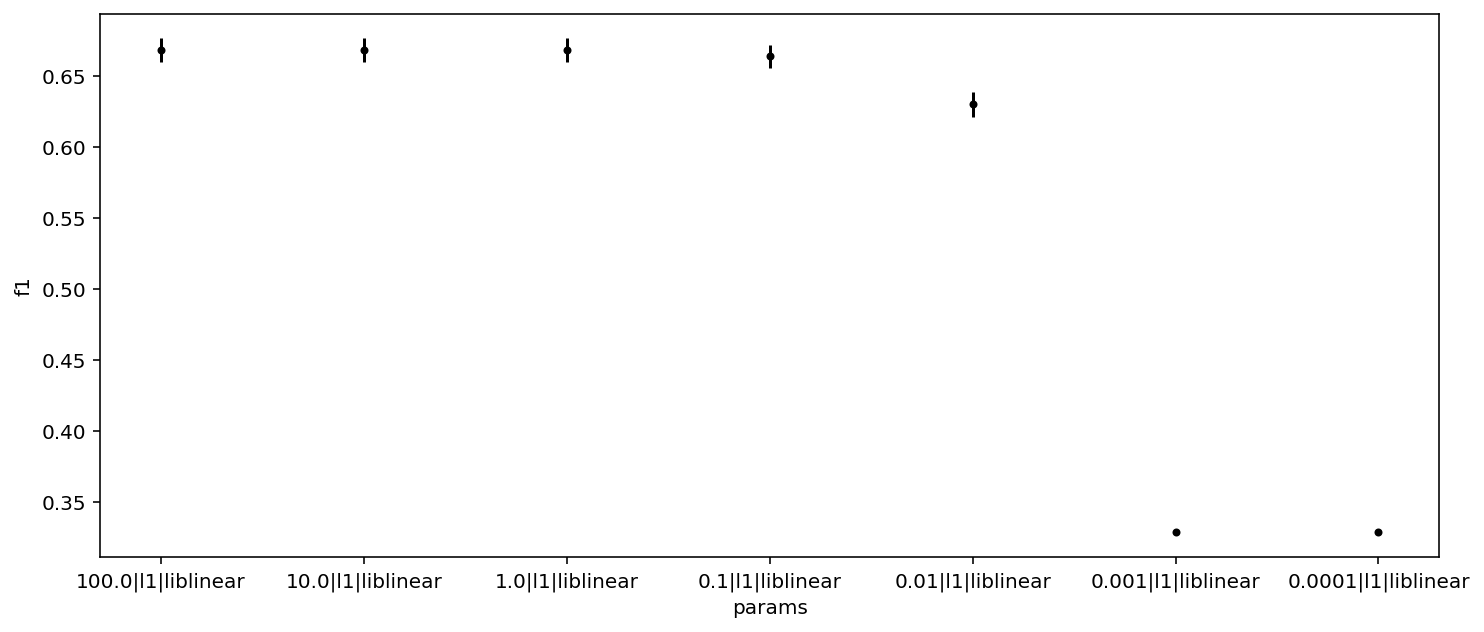

In [73]:
def plot_results(gridsearchcv):
    params = gridsearchcv.cv_results_["params"]
    ys = gridsearchcv.cv_results_["mean_test_score"]
    xs = ['|'.join(str(v) for v in param.values()) for param in params]
    yerr = gridsearchcv.cv_results_["std_test_score"]
    plt.errorbar(xs, ys, yerr / np.sqrt(gridsearchcv.cv), fmt='.k')
    plt.ylabel("f1")
    plt.xlabel("params")
    
def check_for_convergence(gridsearchcv):
    return gridsearchcv.best_estimator_.steps[-1][1].n_iter_ < gridsearchcv.best_estimator_.steps[-1][1].max_iter


np.random.seed(31415) 

scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression() # first step

# YOUR CODE HERE

pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])

# you don't need to modify the max_iter param. If you do, keep it under 1000
# hint, prefix your param names with logistic__ to pass it to the logistic step

# this grid when passed to the gridsearch will make a logistic regression 
# if you add more to the param_grid you can compare differnt models and see their IQR
param_grid = { 
    "logistic__C" : 10.0 ** -np.arange(-2, 5),
    "logistic__solver" : ['liblinear'], # use one algo from here it needs to be l1 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
    "logistic__penalty" : ['l1'] # TA recommends using the l1 penalty 
}

# YOUR CODE HERE

# use f1_micro for scoring
# use 7 folds
gscv = GridSearchCV(pipe, param_grid, scoring = 'f1_micro', cv=7) # GridSearchCV(...)

# YOUR CODE HERE


# gscv.fit(X_train, y_train)
gscv.fit(X_train, y_train)

plot_results(gscv)


### MLP

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df[target_col].unique())

#Scale and convert data to np array
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(le.transform(y_train))
X_test, y_test = np.array(X_test), np.array(le.transform(y_test))

In [96]:
label_dict = {i:le.inverse_transform([i])[0] for i in range(5)}
#Label dictionary for confusion matrix
label_dict

{0: 'Alternative',
 1: 'Doo-wop',
 2: 'Electrolatino',
 3: 'Nuelectro',
 4: 'Reading'}

In [66]:

# Dataset class to load in data into network
class GenreDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [67]:
# Create Validation test to chec for overfitting
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=21)

In [99]:
train_dataset = GenreDataset(torch.from_numpy(X_train_s).float(), torch.from_numpy(y_train_s).long())
val_dataset = GenreDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = GenreDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [69]:
# Initalize training parameters
EPOCHS = 30
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = X_train.shape[1]
NUM_CLASSES = 5

In [78]:
# Initalize data loaders
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          drop_last=True
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [79]:
# MLP Network

class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512) 
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x) # 1st Layer 
        x = self.batchnorm1(x)
        x = self.relu(x) # ReLU Non Linearization
        
        x = self.layer_2(x) # 2nd Layer 
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x) # Dropout layer, randomly grops values for better accuracy
        
        x = self.layer_3(x) # 3rd layer
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        #x = self.layer_out(x) # Output layer, will need to softmax while testing

        
        return x

In [80]:
# Check and activate gpu

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [81]:
# Initalize Model and set optimizer and metric

model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=6, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [82]:
# Accuracy Metric

def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [83]:
# Dictionaries for plotting training curve

accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [84]:
# Start Training

from tqdm import tqdm

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0

    print("Training...")

    # Set model to train mode
    model.train()

    # Feed model in batches
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        

    print("Validating")    
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        #Stop training model and begin evaluation on validation set
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                                
        
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


  0%|          | 0/30 [00:00<?, ?it/s]

Training...
Validating


  3%|▎         | 1/30 [00:02<01:04,  2.23s/it]

Epoch 001: | Train Loss: 1.00760 | Val Loss: 0.84094 | Train Acc: 62.359| Val Acc: 70.614
Training...
Validating


  7%|▋         | 2/30 [00:04<01:00,  2.16s/it]

Epoch 002: | Train Loss: 0.92771 | Val Loss: 0.81709 | Train Acc: 64.605| Val Acc: 71.053
Training...
Validating


 10%|█         | 3/30 [00:06<00:56,  2.10s/it]

Epoch 003: | Train Loss: 0.90143 | Val Loss: 0.81864 | Train Acc: 65.785| Val Acc: 69.956
Training...
Validating


 13%|█▎        | 4/30 [00:08<00:56,  2.19s/it]

Epoch 004: | Train Loss: 0.88895 | Val Loss: 0.80213 | Train Acc: 66.016| Val Acc: 70.614
Training...
Validating


 17%|█▋        | 5/30 [00:11<00:56,  2.26s/it]

Epoch 005: | Train Loss: 0.88342 | Val Loss: 0.80455 | Train Acc: 65.730| Val Acc: 69.298
Training...
Validating


 20%|██        | 6/30 [00:13<00:52,  2.17s/it]

Epoch 006: | Train Loss: 0.87130 | Val Loss: 0.79668 | Train Acc: 66.742| Val Acc: 69.298
Training...
Validating


 23%|██▎       | 7/30 [00:15<00:48,  2.09s/it]

Epoch 007: | Train Loss: 0.85938 | Val Loss: 0.78648 | Train Acc: 66.988| Val Acc: 69.079
Training...
Validating


 27%|██▋       | 8/30 [00:16<00:44,  2.04s/it]

Epoch 008: | Train Loss: 0.84535 | Val Loss: 0.78881 | Train Acc: 67.613| Val Acc: 69.518
Training...
Validating


 30%|███       | 9/30 [00:18<00:42,  2.01s/it]

Epoch 009: | Train Loss: 0.84142 | Val Loss: 0.78636 | Train Acc: 67.770| Val Acc: 69.737
Training...
Validating


 33%|███▎      | 10/30 [00:21<00:41,  2.06s/it]

Epoch 010: | Train Loss: 0.82523 | Val Loss: 0.79518 | Train Acc: 68.641| Val Acc: 69.079
Training...
Validating


 37%|███▋      | 11/30 [00:23<00:39,  2.09s/it]

Epoch 011: | Train Loss: 0.83065 | Val Loss: 0.79688 | Train Acc: 68.988| Val Acc: 68.640
Training...
Validating


 40%|████      | 12/30 [00:25<00:38,  2.16s/it]

Epoch 012: | Train Loss: 0.81796 | Val Loss: 0.79185 | Train Acc: 68.250| Val Acc: 67.763
Training...
Validating


 43%|████▎     | 13/30 [00:27<00:35,  2.12s/it]

Epoch 013: | Train Loss: 0.80501 | Val Loss: 0.79031 | Train Acc: 69.082| Val Acc: 69.518
Training...
Validating


 47%|████▋     | 14/30 [00:29<00:34,  2.18s/it]

Epoch 014: | Train Loss: 0.80475 | Val Loss: 0.78722 | Train Acc: 69.191| Val Acc: 68.640
Training...
Validating


 50%|█████     | 15/30 [00:32<00:32,  2.18s/it]

Epoch 015: | Train Loss: 0.79462 | Val Loss: 0.78725 | Train Acc: 69.855| Val Acc: 69.079
Training...
Validating


 53%|█████▎    | 16/30 [00:34<00:31,  2.24s/it]

Epoch 016: | Train Loss: 0.78997 | Val Loss: 0.78728 | Train Acc: 69.008| Val Acc: 68.860
Training...
Validating


 57%|█████▋    | 17/30 [00:36<00:29,  2.25s/it]

Epoch 017: | Train Loss: 0.78257 | Val Loss: 0.78792 | Train Acc: 70.316| Val Acc: 69.079
Training...
Validating


 60%|██████    | 18/30 [00:38<00:26,  2.25s/it]

Epoch 018: | Train Loss: 0.77443 | Val Loss: 0.78379 | Train Acc: 70.305| Val Acc: 69.518
Training...
Validating


 63%|██████▎   | 19/30 [00:41<00:25,  2.34s/it]

Epoch 019: | Train Loss: 0.76413 | Val Loss: 0.79005 | Train Acc: 71.047| Val Acc: 68.860
Training...
Validating


 67%|██████▋   | 20/30 [00:43<00:23,  2.31s/it]

Epoch 020: | Train Loss: 0.76056 | Val Loss: 0.77150 | Train Acc: 70.477| Val Acc: 69.298
Training...
Validating


 70%|███████   | 21/30 [00:45<00:20,  2.29s/it]

Epoch 021: | Train Loss: 0.76187 | Val Loss: 0.78369 | Train Acc: 70.797| Val Acc: 69.518
Training...
Validating


 73%|███████▎  | 22/30 [00:48<00:18,  2.28s/it]

Epoch 022: | Train Loss: 0.75026 | Val Loss: 0.78035 | Train Acc: 71.492| Val Acc: 69.518
Training...
Validating


 77%|███████▋  | 23/30 [00:50<00:16,  2.33s/it]

Epoch 023: | Train Loss: 0.73751 | Val Loss: 0.77033 | Train Acc: 70.902| Val Acc: 70.175
Training...
Validating


 80%|████████  | 24/30 [00:52<00:13,  2.26s/it]

Epoch 024: | Train Loss: 0.74187 | Val Loss: 0.77995 | Train Acc: 71.652| Val Acc: 69.079
Training...
Validating


 83%|████████▎ | 25/30 [00:54<00:11,  2.23s/it]

Epoch 025: | Train Loss: 0.72789 | Val Loss: 0.77265 | Train Acc: 72.258| Val Acc: 69.956
Training...
Validating


 87%|████████▋ | 26/30 [00:56<00:08,  2.18s/it]

Epoch 026: | Train Loss: 0.71453 | Val Loss: 0.77367 | Train Acc: 72.328| Val Acc: 69.079
Training...
Validating


 90%|█████████ | 27/30 [00:58<00:06,  2.12s/it]

Epoch 027: | Train Loss: 0.72019 | Val Loss: 0.77686 | Train Acc: 71.730| Val Acc: 69.737
Training...
Validating


 93%|█████████▎| 28/30 [01:00<00:04,  2.07s/it]

Epoch 028: | Train Loss: 0.70852 | Val Loss: 0.76443 | Train Acc: 72.480| Val Acc: 69.956
Training...
Validating


 97%|█████████▋| 29/30 [01:03<00:02,  2.07s/it]

Epoch 029: | Train Loss: 0.69650 | Val Loss: 0.78780 | Train Acc: 73.031| Val Acc: 68.421
Training...
Validating


100%|██████████| 30/30 [01:05<00:00,  2.18s/it]

Epoch 030: | Train Loss: 0.69681 | Val Loss: 0.75615 | Train Acc: 73.031| Val Acc: 70.833


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

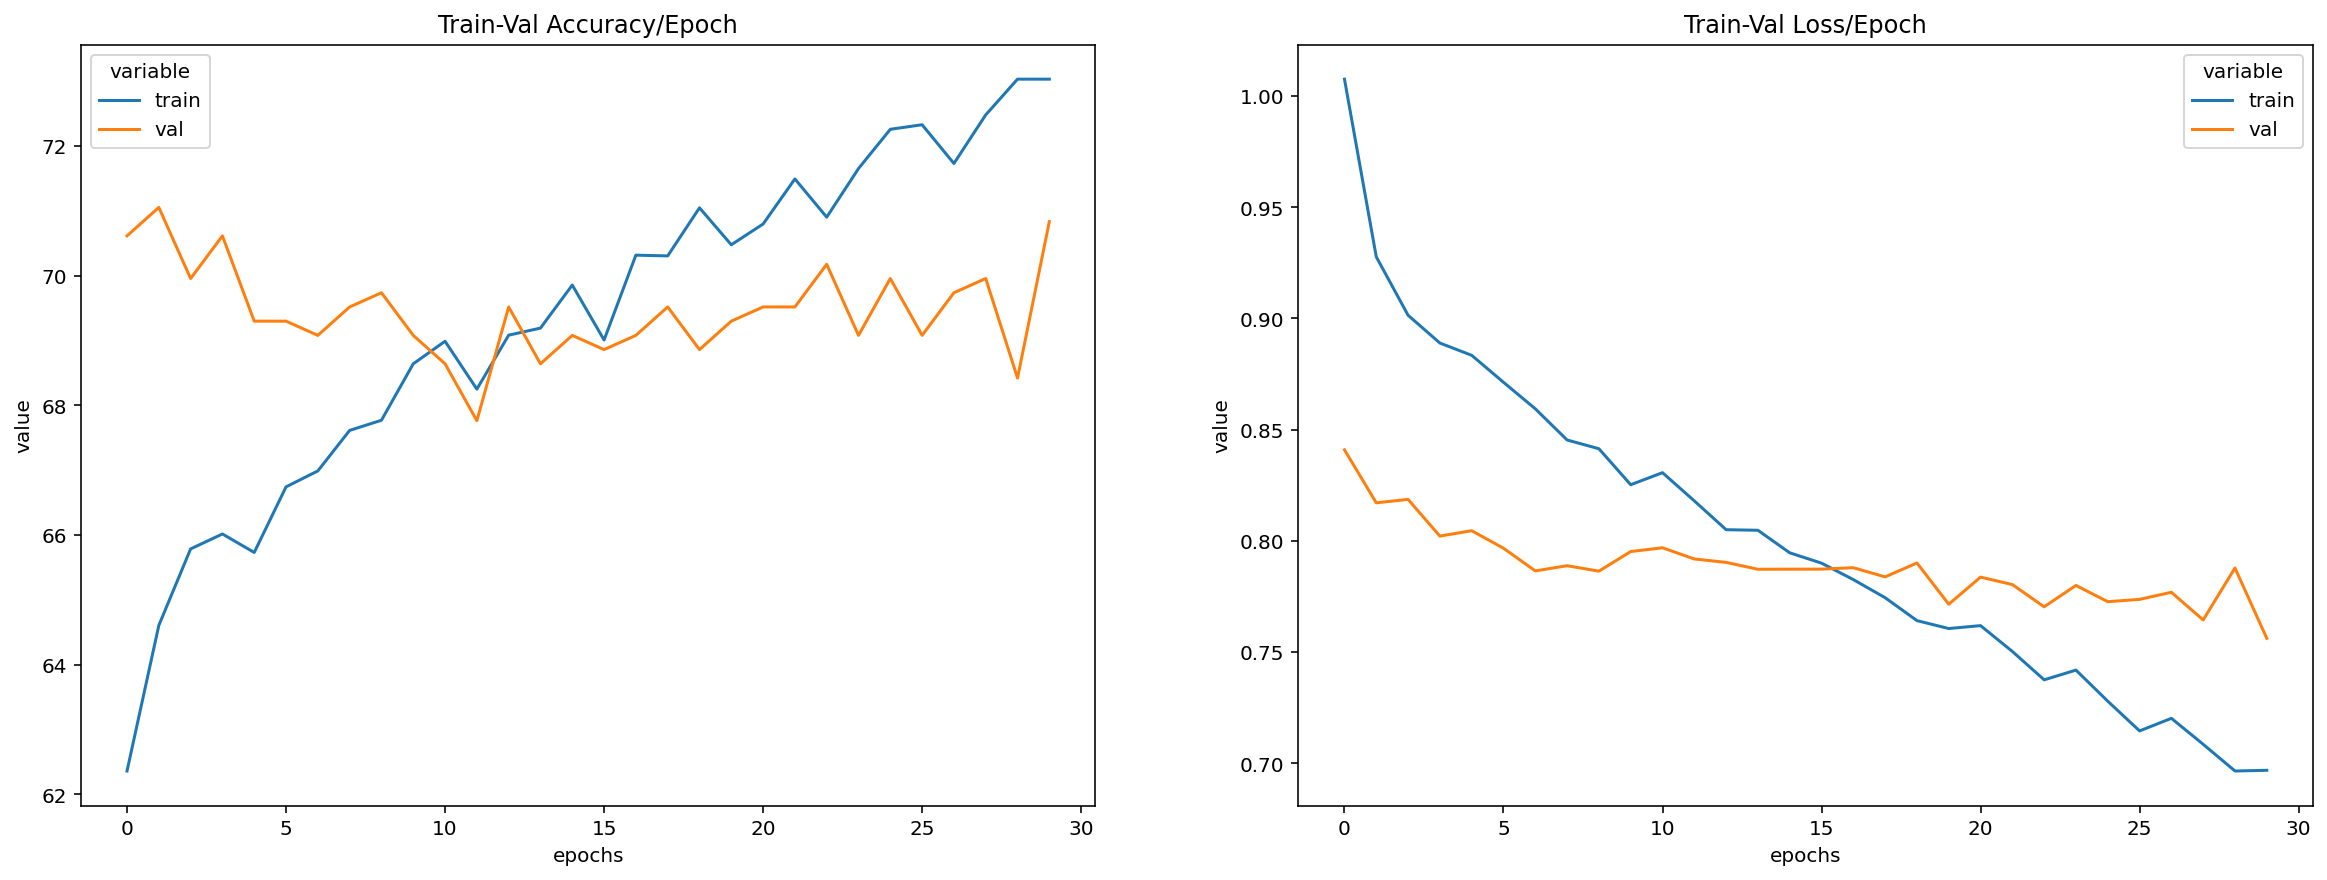

In [85]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [86]:
# Test on test set

y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

<AxesSubplot:>

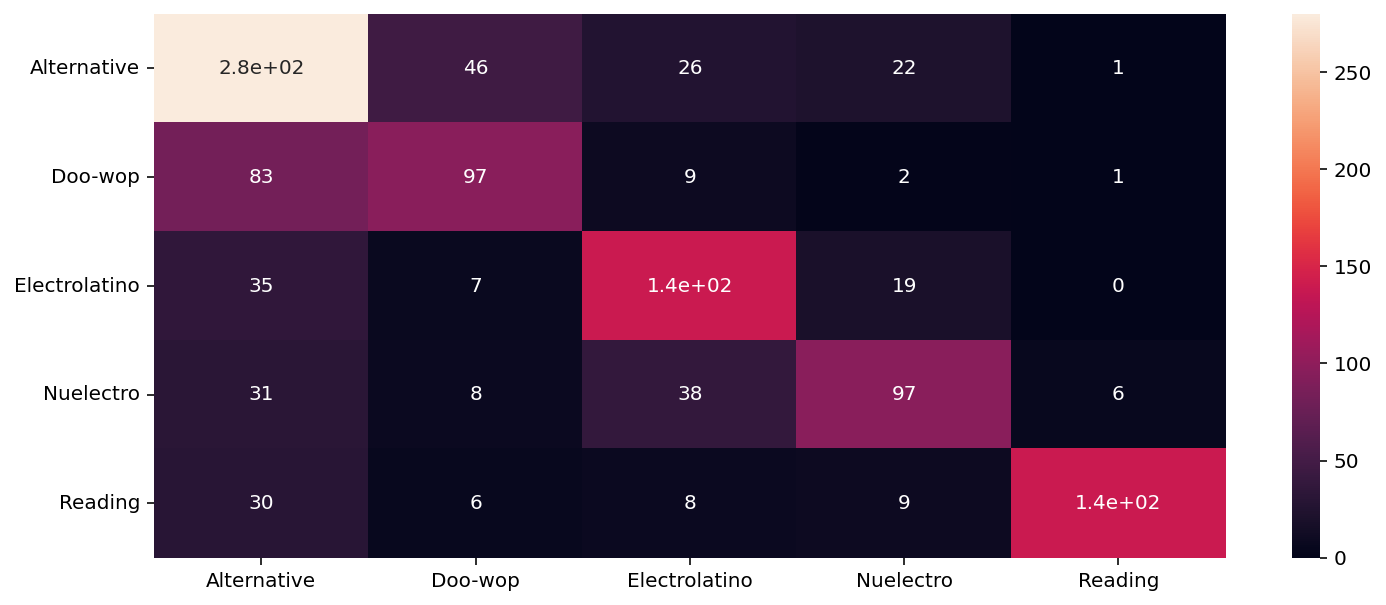

In [97]:
# Confusion matrix of test set

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=label_dict, index=label_dict)

sns.heatmap(confusion_matrix_df, annot=True)

In [98]:
# Metrics od model performance of each class 

print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       375
           1       0.59      0.51      0.54       192
           2       0.63      0.69      0.66       200
           3       0.65      0.54      0.59       180
           4       0.95      0.72      0.82       192

    accuracy                           0.66      1139
   macro avg       0.69      0.64      0.66      1139
weighted avg       0.67      0.66      0.66      1139

